In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from ast import literal_eval
import ast
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import json

In [2]:
df = pd.read_csv('train.csv')
train = pd.DataFrame()
test = pd.read_csv('test.csv')

In [3]:
display(df.columns)
display(df.describe())
display(df.info())

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

None

In [4]:
display(df.isnull().sum()/len(df))

id                       0.000000
belongs_to_collection    0.798667
budget                   0.000000
genres                   0.002333
homepage                 0.684667
imdb_id                  0.000000
original_language        0.000000
original_title           0.000000
overview                 0.002667
popularity               0.000000
poster_path              0.000333
production_companies     0.052000
production_countries     0.018333
release_date             0.000000
runtime                  0.000667
spoken_languages         0.006667
status                   0.000000
tagline                  0.199000
title                    0.000000
Keywords                 0.092000
cast                     0.004333
crew                     0.005333
revenue                  0.000000
dtype: float64

C:\Users\lib-moffcirc\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


count    2.054000e+03
mean     4.216585e+07
std      7.474238e+07
min      1.000000e+00
25%      1.893915e+06
50%      1.232864e+07
75%      4.637010e+07
max      8.766885e+08
Name: revenue, dtype: float64

count    9.460000e+02
mean     1.200517e+08
std      2.091265e+08
min      1.000000e+00
25%      4.010988e+06
50%      3.545522e+07
75%      1.356870e+08
max      1.519558e+09
Name: revenue, dtype: float64

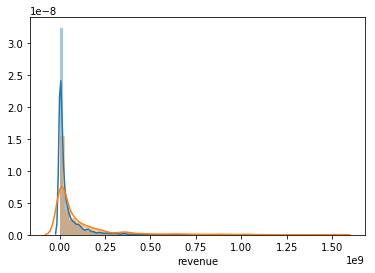

In [5]:
nullhomerev = df.loc[df['homepage'].isnull(), 'revenue']
homerev = df.loc[df['homepage'].notnull(), 'revenue']
sns.distplot(nullhomerev)
sns.distplot(homerev)
display(nullhomerev.describe())
display(homerev.describe())
hashomepage = np.array(df.homepage.isna(), dtype=int)
train['hashomepage'] = hashomepage

In [6]:
df = df.drop('belongs_to_collection', axis = 1)

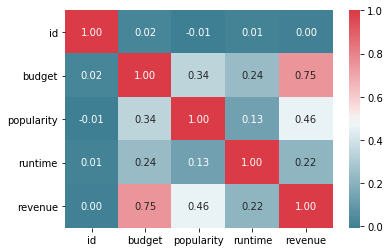

In [7]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(), cmap=colormap, annot=True, fmt=".2f")


C:\Users\lib-moffcirc\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\lib-moffcirc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\lib-moffcirc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


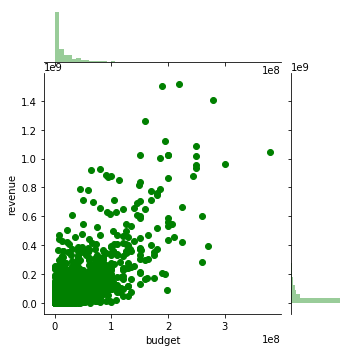

In [8]:
sns.jointplot(x="budget", y="revenue", data=df, height=5, ratio=4, color="g")
scaler = preprocessing.StandardScaler()
train['budget'] = scaler.fit_transform(np.array(df['budget']).reshape(-1,1))

C:\Users\lib-moffcirc\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


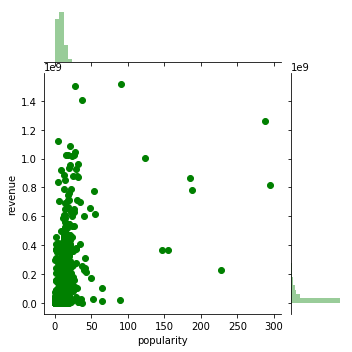

In [9]:
sns.jointplot(x="popularity", y="revenue", data=df, height=5, ratio=4, color="g")

In [10]:
df['runtime'] = df['runtime'].fillna(np.mean(df['runtime']))

C:\Users\lib-moffcirc\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


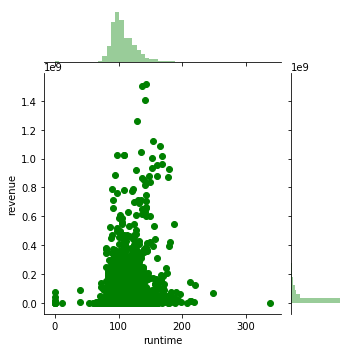

In [11]:
g = sns.jointplot(x='runtime', y="revenue", data=df, height=5, ratio=4, color="g")



In [12]:
def to_lists(df,col):
    dictionaries = df[col].apply(lambda x: {} if pd.isnull(x) else ast.literal_eval(x))
    for x in dictionaries.index:
        dictionaries[x] = [i['name'] for i in dictionaries[x]]
    df[col] = dictionaries
to_lists(df,'cast')
to_lists(df,'production_companies')
to_lists(df,'genres')

In [13]:
genres= set()
for genrelists in df['genres']:    
    for x in genrelists:
        genres.add(x)

In [14]:
for genre in genres:
    one_hot = [1 if genre in x else 0 for x in df['genres']]
    train[genre + ' one hot'] = one_hot

In [15]:
companies= set()
for company in df['production_companies']:
    for x in company:
        companies.add(x)
companies
from collections import Counter
common_companies = Counter([i for j in df['production_companies'] for i in j]).most_common(20)
toptwentycompanies = [x for x,y in common_companies]
for company in toptwentycompanies:
    one_hot = [1 if company in x else 0 for x in df['production_companies']]
    train[company + ' one hot'] = one_hot

common_actors = Counter([i for j in df['cast'] for i in j]).most_common(20)
top20actors = [x for x,y in common_actors]
for actor in top20actors:
    one_hot = [1 if company in x else 0 for x in df['cast']]
    train[actor + ' one hot'] = one_hot

In [16]:
from sklearn.feature_selection import SelectKBest, f_classif,chi2
y = np.log(df['revenue'])

In [17]:
selector = SelectKBest(k=5)
selector.fit(train, y)

C:\Users\lib-moffcirc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [ 8 29 37 38 40 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61] are constant.
  UserWarning)
C:\Users\lib-moffcirc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\lib-moffcirc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k=5, score_func=<function f_classif at 0x0000019CAF28D1E0>)

In [18]:
from datetime import datetime 
tofix = df['release_date'][0]
def datefixer(x):
    split_array = x.split('/')
    if int(split_array[2]) <= 19:
        split_array[2] = '20' + split_array[2]
    else:
        split_array[2] = '19' + split_array[2]
    x = '/'.join(split_array)
    return x
df['release_date'] = df['release_date'].apply(lambda x: datefixer(x))
df['release_date'] = df['release_date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))

In [19]:
month_one_hot = pd.get_dummies(df['release_date'].apply(lambda x:x.month))
for i in month_one_hot.columns:
    train['month_' + str(i)] = month_one_hot[i]
    

In [20]:
train = train.drop('TV Movie one hot', axis = 1)

In [21]:

lgb_train = lgb.Dataset(train, y)
#lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'num_leaves': 40,
    'learning_rate': 0.09,
    'bagging_fraction': 0.2,
    'feature_fraction':.2,
    'lambda_l2':.5,
    'metric':'rmse',
    'eval_at':5
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                )


print('Starting predicting...')
# predict
y_pred = gbm.predict(train, num_iteration=759)
# eval
print(pd.isnull(np.log(y_pred)).sum())
print('The rmse of prediction is:', mean_squared_error(y, y_pred) ** 0.5)

Starting training...
Starting predicting...
0
The rmse of prediction is: 1.8201182196375936


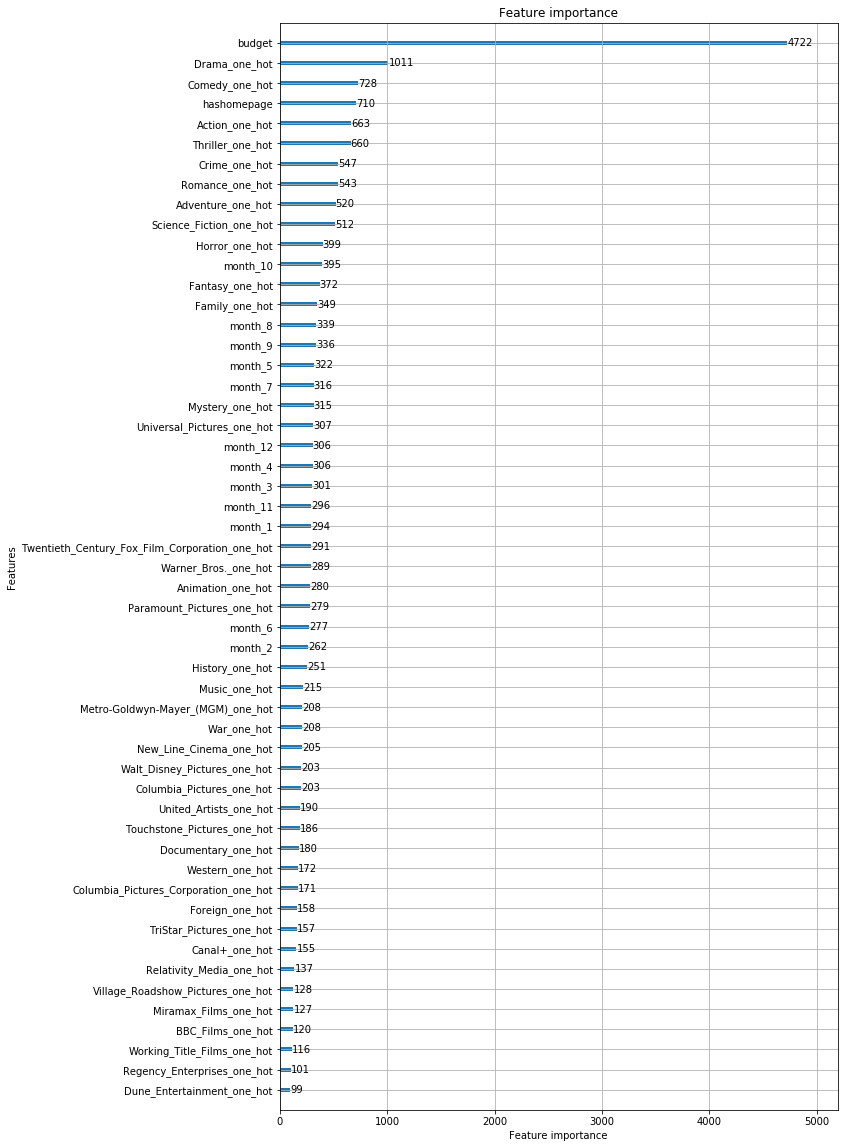

In [22]:
lgb.plot_importance(gbm,figsize = (10,20))